(Useful_calculus:Fourier Transforms)=
# Fourier transforms

## Superposition of waves
When two or more waves meet, for example when two boats pass each other, their wake waves will overlap in space. The surface displacement (amplitude) will, at any point, be the sum of the surface displacement for the individual waves.

When looking at the ocean surface, the surface elevation can be regarded as the sum of (superposition) of many waves of different frequencies and phases.

Insert figure of individual waves and the superposition

(-7.5, 7.5)

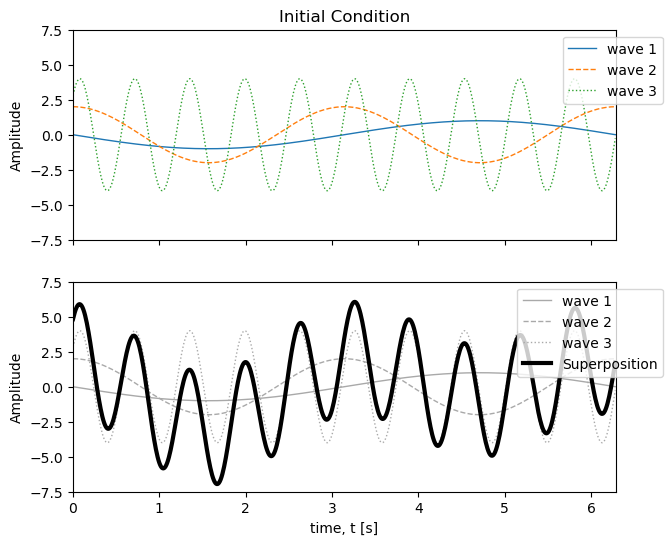

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create time values
t = np.arange(0, 2 * np.pi,0.01) #eight cycles, with 0.1 second resolution

#define frequencies, phases, and amplitudes of three sine waves
frequencies=1./np.array([2*np.pi,np.pi,2./np.pi])
phases=np.pi*np.array([1.,1./2,1./4])
amplitudes=np.array([1.,2.,4.])

# compute the wave signals
wave1 = amplitudes[0] * np.sin(2 * np.pi * frequencies[0] * t + phases[0])
wave2 = amplitudes[1] * np.sin(2 * np.pi * frequencies[1] * t + phases[1])
wave3 = amplitudes[2] * np.sin(2 * np.pi * frequencies[2] * t + phases[2])

# Add the sine waves together
superposition_wave = wave1 + wave2 + wave3

#plot the wave signals
fig, ax = plt.subplots(2, 1, figsize=(7, 6), sharex=True)
ax[0].set_xlim(( 0, 2*np.pi))
ax[0].set_ylim((-7.5, 7.5))

line1, = ax[0].plot(t, wave1,'-', lw = 1, label='wave 1')
line2, = ax[0].plot(t, wave2,'--', lw = 1, label='wave 2')
line3, = ax[0].plot(t, wave3,':', lw = 1, label='wave 3')

ax[1].plot(t, wave1,'-',color='darkgrey', lw = 1, label='wave 1')
ax[1].plot(t, wave2,'--',color='darkgrey', lw = 1, label='wave 2')
ax[1].plot(t, wave3,':',color='darkgrey',lw = 1, label='wave 3')
line4, = ax[1].plot(t, superposition_wave,'k', lw = 3, label='Superposition')

ax[0].set_ylabel('Amplitude')
ax[0].set_title("Initial Condition")
ax[0].legend(loc="upper right", bbox_to_anchor=(1.1, 1))
ax[1].legend(loc="upper right", bbox_to_anchor=(1.1, 1))
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('time, t [s]')
ax[1].set_ylim((-7.5, 7.5))

## Time/space domain versus frequency domain - The Fourier Series

A data signal can be represented in either a time/space domain or a frequency domain. 

The time domain represents how the signal (for example air temperature) is changing with time, $t$. The time is running along the horizontal axis and the temperature is in the vertical axis. Mathematically, we would say that the temperature is a function of time, $y(t)$. Similarly, the space domain represents how the signal (for example air temperature) is changing with space or distance, $x$. Then, the resulting function would be $y(x)$. 

To get a meaningful interpretation of the frequency domain, we must first approximate our signal by the sum of the mean value of our signal, $\bar{y(t)}$, and a superposition of many waves with different frequencies, amplitudes, and phases, $T$. The more frequencies, $\omega_n$ with unit [radians per time], we include in the superposition, the better the approximation is. The approximation is typoically valid within a certain time period, $T$. The frequencies are related to the time period, through $\omega_n=2\pi/T$.

$$
y(t)=\bar{y(t)}+\sum_n[A_ncos(\omega_n t)+B_nsin(\omega_n t)]
$$ (eq:Fourier_series)

The number of frequencies we can reolve in a time series, depend on the time interval and the sampling frequency. To resolve a wave signal, we need at least 2 datapoints per wavelength. The highest resolveable frequency, will therefore be $f_N=(N/2)/N\Delta t=1/2\Delta t$. This is called the Nyquist frequency.

Another way of representing the function $y(t)$ as a Fourier series, is to note that $\bar{y(t)}$ can be written as $A_n/2$:

$$
y(t)=\frac{A_0}{2}+\sum_n[A_ncos(\omega_n t)+B_nsin(\omega_n t)]
$$ (eq:Fourier_series)

The amplitude of each wave in the superposition, can be derived from the following equations:

$$
A_n=\frac{2}{T}\int_{0}^{T}f(t)cos(\omega_n t)dt, n=0,1,2,...\\
B_n=\frac{2}{T}\int_{0}^{T}f(t)sin(\omega_n t)dt, n=1,2,...
$$ (eq:Fourier_series_amplitude)

We can also construct the Fourier series using complex notation for currents, e.g., by stating that $U(t)=u(t)+iv(t)$, when $u(t)$ and $v(t)$ are velocities in east and north direction, respectively:

$$
U(t)=\sum_{n=0}^\infty c_n e^{i 2\pi\frac{n}{T}t}
$$ (eq:Fourier_series_complex_euler)

, where

$$
c_n=\frac{1}{T}\int_{0}^{T}U(t)e^{-i\frac{2\pi}{T}t}dt
$$ (eq:Fourier_series_amplitude)

## The Fourier transform pair

When we have created our approximated signal, we can calculate the amount of energy (wave amplitude) related to each frequency. The result is a function that displays the energy as a function of frequency. If we let $t\rightarrow \infty$ and include enough wave frequencies to allow $n/T \rightarrow \xi$ we can now write a function of the amount of energy as in terms of each wave. This is how our signal looks in the frequency domain, and this function is called the Fourier transform. There are two versions, one continuous and one discrete:

For a continuous functions, $y(t)$ the Fourier transform pair is  defined:

$$
\begin{align}
Y(f)&=\int_{-\infty}^\infty y(t)e^{-i2\pi ft}dt\\
y(t)&=\int_{-\infty}^\infty Y(f)e^{i2\pi ft}df\\
&=\frac{1}{2\pi}\int_{-\infty}^\infty Y(f)e^{i\omega t}d\omega
\end{align}
$$ (eq:Fourier_transform_continuous)
,where $\omega=2\pi f$. The functions are inverse set of functions.

For discrete data series (in time or space), the Fourier transform is:

$$
Y(f)=\Delta t \sum_{-\infty}^\infty y_n e^{-i2\pi ft}
$$ (eq:Fourier_transform)

Here, the function $Y(f)$ represent energy as a function of the frequency $f$. If the signal consisted of just one pure sine wave, the graph of $Y(f)$ would contain a single spike at the frequency of this sine wave.

C:\Users\kda005\Anaconda3\envs\GEOF211_compendium\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\kda005\Anaconda3\envs\GEOF211_compendium\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Fourier Transform of superposition wave')

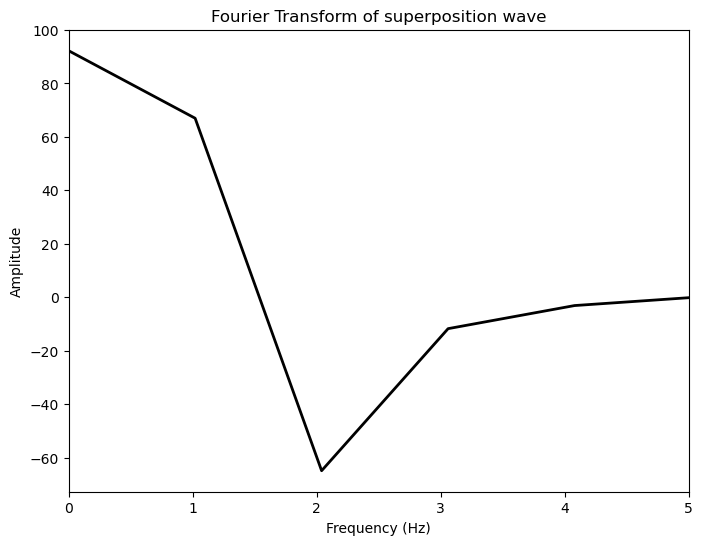

In [2]:
#import fft package using only real numbers into the transform
from scipy.fft import rfft, rfftfreq

# Calculate N
N = len(t)
sampling_rate = 1 / (t[1] - t[0])

# Compute the Fourier transform
frequency_eval_max = 100 #max number of components
superposition_wave_rfft = rfft(superposition_wave, n=frequency_eval_max)
n = np.shape(superposition_wave_rfft)[0] # np.size(t)
frequencies_rel = n*sampling_rate/frequency_eval_max * np.linspace(0,1,int(n))

# Plot the Fourier transform
plt.figure(figsize=(8, 6))
plt.plot(frequencies_rel, superposition_wave_rfft,'k',lw=2, label="Fourier Transform")

plt.title('Spectrum')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')

plt.xlim([0,5])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Fourier Transform of superposition wave")

# Gibbs phenomenon
In practice, we typically cannot include an infinite number of terms in the Fourier series to represent a signal. using a limited number of components works fine for continuous signals, but will produce errors (overshoots and undershoots) near discontinuities and areas wih strong gradients. This is called the Gibbs phenomenon.

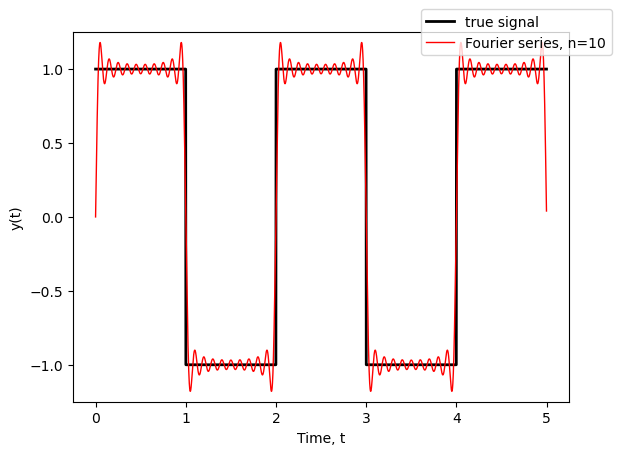

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0,5,0.001)

# t.astype(int) % 2 will alternate between the value 1 and zero
square_wave = 1 - 2 * (t.astype(int) % 2)

N = 10 #number of frequencies to include
superpos = np.zeros_like(t) #short for superposition

for i in range(N): #loop through the 20 first sine waves
    n = 2*i + 1 #only odd numbers 
    superpos += np.sin(n * np.pi *t) / n #adds the sine wave for n into the superposition so far
superpos *= 4 / np.pi

fig, ax = plt.subplots()
ax.plot(t, square_wave,'k', lw=2,label='true signal')
ax.plot(t, superpos, 'r',lw=1, label='Fourier series, n=10')
ax.legend(loc="center right", bbox_to_anchor=(1.1, 1))
ax.set_ylim(-1.25,1.25)
plt.xlabel("Time, t")
plt.ylabel("y(t)")


plt.show()